In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
target_user = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']
df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@nytimes":''}, index=[0])
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@nytimes
0,,,,,


In [4]:
#Loop through each user
for user in target_user:
    counter = 0
    #Loop through 100 tweets
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        #Extract text
        text = status.text
        #Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        
        #Add each value to the dataframe
        df.set_value(counter, user, compound)
        #Increment counter
        counter = counter + 1

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [5]:
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@nytimes
0,0.2023,-0.5574,0,0.368,0.25
1,0,0.6705,-0.7506,0,-0.296
2,0,-0.4404,0.7003,0.6705,-0.4404
3,0,0,0.1779,0,0.3612
4,0,-0.7717,0,-0.743,-0.8176


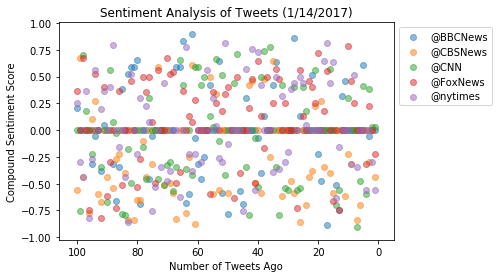

In [10]:
x = np.arange(100, 0, -1)
a = plt.scatter(x, df['@BBCNews'], alpha=0.5)
b = plt.scatter(x, df['@CBSNews'], alpha=0.5)
c = plt.scatter(x, df['@CNN'], alpha=0.5)
d = plt.scatter(x, df['@FoxNews'], alpha=0.5)
e = plt.scatter(x, df['@nytimes'], alpha=0.5)
plt.title('Sentiment Analysis of Tweets (1/14/2017)')
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Compound Sentiment Score')
plt.gca().invert_xaxis()
plt.legend((a,b,c,d,e),('@BBCNews', '@CBSNews','@CNN', '@FoxNews', '@nytimes'),numpoints=1, loc='upper right', ncol=1, fontsize=8)
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('Sentiment_Plot.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [7]:
#Find the average of each news channel

df_mean = df.mean()

df_mean.head()

@BBCNews   -0.003294
@CBSNews   -0.193891
@CNN       -0.038836
@FoxNews    0.069790
@nytimes    0.012871
dtype: float64

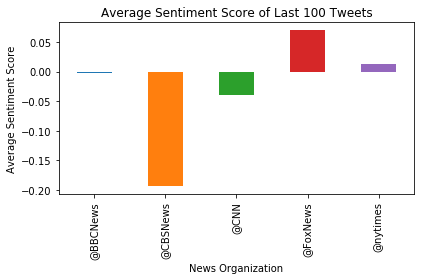

In [8]:
df_mean.plot(kind='bar')
plt.title('Average Sentiment Score of Last 100 Tweets')
plt.xlabel('News Organization')
plt.ylabel('Average Sentiment Score')
plt.savefig('Sentiment_Avg.png')
plt.tight_layout()
plt.show()